## 1. Get webpage using *requests*

In [1]:
from requests import get

# request the server the content of the web page by using get()
# store the server’s response in the variable response.
response = get('https://www.imdb.com/search/title/?title_type=feature&year=2022-01-01,2022-12-31&sort=num_votes,desc&view=advanced')

# print a small part of response's content by accessing its .text attribute
# (response is now a Response object).
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
      


<!DOCTYPE html>
<html lang="en-US">
   <head>
      <title>Access denied</title>
      <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
      <meta name="robots" content="noindex, nofollow" />
      <meta name="viewport" content="width=device-width,initial-scale=1" />
      <link rel="stylesheet" href="/cdn-cgi/styles/errors.css" media="screen" />
      <script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener(
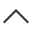

In [29]:
print(webpage)

## 2. Get specific contents using BeatifulSoup

In [2]:
from bs4 import BeautifulSoup

# The 'html.parser' argument indicates that we want to do the
# parsing using Python’s built-in HTML parser.
html_soup = BeautifulSoup(response.text, 'html.parser')

type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
#stored the content of this container in the first_movie variable
first_movie = movie_containers[0]

In [6]:
# check to make sure first movie is same as we saw on search page
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt1877830"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt1877830/"> <img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDdmMTBiNTYtMDIzNi00NGVlLWIzMDYtZTk3MTQ3NGQxZGEwXkEyXkFqcGdeQXVyMzMwOTU5MDk@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1877830/">The Batman</a>
<span class="lister-item-year text-muted unbold">(2022)</span>
</h3>
<p class="text-muted">
<span class="certificate">PG-13</span>
<span class="ghost">|</span>
<span class="runtime">176 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Crime, Drama        

In [7]:
first_movie.h3.a.text

'The Batman'

In [9]:
first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold').text

'(2022)'

In [10]:
first_movie.strong.text

'7.8'

In [11]:
# who direct the movie?

first_movie.find('p', class_ = '')
# check to see whether he was Matt Reeves.

<p class="">
    Director:
<a href="/name/nm0716257/">Matt Reeves</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1500155/">Robert Pattinson</a>, 
<a href="/name/nm2368789/">Zoë Kravitz</a>, 
<a href="/name/nm0942482/">Jeffrey Wright</a>, 
<a href="/name/nm0268199/">Colin Farrell</a>
</p>

In [12]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [ ]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2023)]

### 3. Sleep

You would be banned, if you scrape a website too fast. Let your crawler sleep for a while after each round.

In [13]:
from time import sleep
from random import randint

In [14]:
from time import time

# Set a starting time using the time() function from the time module, and assign the value to start_time.
start_time = time()

# Assign 0 to the variable requests which we’ll use to count the number of requests.
request = 0

#Start a loop, and then with each iteration:
    #- Simulate a request.
    #- Increment the number of requests by 1.
    #- Pause the loop for a time interval between 8 and 15 seconds.
    #- Calculate the elapsed time since the first request, and assign the value to elapsed_time.
    #- Print the number of requests and the frequency.
    
for _ in range(5):
    request += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(request, request/elapsed_time))

Request: 1; Frequency: 0.3327651189687917 requests/s
Request: 2; Frequency: 0.39915859203919046 requests/s
Request: 3; Frequency: 0.4986675618940813 requests/s
Request: 4; Frequency: 0.49866240888501123 requests/s
Request: 5; Frequency: 0.4986585227071966 requests/s


In [15]:
from IPython.core.display import clear_output

start_time = time()
request = 0

for _ in range(5):
    request += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(request, request/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.4532517167636689 requests/s


In [17]:
names = []
years = []
imdb_ratings = []
metascores = []
directors = []
votes = []
gross = []

# Prepare the loop
start_time = time()
request = 0

pages = [str(i) for i in range(1,3)]
years_url = [str(i) for i in range(2021,2022)]

# For every year in the interval 2021-2022, not including 2022
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        # Exp: https://www.imdb.com/search/title/?release_date=2019&sort=num_votes,desc&page=1
        response = get('http://www.imdb.com/search/title?release_date='+year_url+'&sort=num_votes,desc&page='+page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        request += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(request, request/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(request, response.status_code))

        # Break the loop if the number of requests is greater than expected
        # 4 pages * 10 years = 40 requests
        if request > 40:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))
                
                # Scrape the directors
                director = ''.join(container.find('p', class_ = '').text.split('Stars')[0].split('\n')[2:-2])
                directors.append(director)

                # Scrape the number of votes
                vote = container.find_all('span', attrs = {'name':'nv'})[0]['data-value']
                votes.append(int(vote))
                
                # If the movie has a Gross, then:
                if len(container.find_all('span', attrs = {'name':'nv'})) >= 2:
                    
                    # Scrape the gross
                    gross_value = container.find_all('span', attrs = {'name':'nv'})[1]['data-value']
                    gross.append(gross_value)
                    
                else:
                    gross.append("-")   

Request:2; Frequency: 0.0712900808521175 requests/s


In [18]:
import pandas as pd
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'directors': directors,
'votes': votes,
'gross($)': gross,
})
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      74 non-null     object 
 1   year       74 non-null     object 
 2   imdb       74 non-null     float64
 3   metascore  74 non-null     int64  
 4   directors  74 non-null     object 
 5   votes      74 non-null     int64  
 6   gross($)   74 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.2+ KB
None


,movie,year,imdb,metascore,directors,votes,gross($)
0,Spider-Man: No Way Home,(2021),8.2,71,Jon Watts,770293,"804,747,988"
1,Dune,(2021),8.0,74,Denis Villeneuve,649201,"108,327,830"
2,Don't Look Up,(2021),7.2,49,Adam McKay,545247,-
3,No Time to Die,(2021),7.3,68,Cary Joji Fukunaga,409237,"160,869,031"
4,Zack Snyder's Justice League,(2021),8.0,54,Zack Snyder,403667,-
...,...,...,...,...,...,...,...
69,CODA,(2021),8.0,72,Sian Heder,138664,-
70,F9: The Fast Saga,(2021),5.2,58,Justin Lin,136680,"173,202,780"
71,The Guilty,(2021),6.3,63,Antoine Fuqua,129971,-
72,The French Dispatch,(2021),7.1,74,Wes Anderson,127016,-


In [21]:
movie_result = movie_ratings.to_csv('movie_ratings_raw.csv')

In [22]:
movie_result